In [1]:
import scipy.io as sp
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score
from functions import *
import matplotlib.pyplot as plt

In [17]:
acc = cross_validation(matrix, cat_labels)
print(acc)

0.7424855491329481


In [ ]:
linear_clf = svm.SVC(kernel = 'linear',verbose = True)
x_train, y_train, x_test, y_test = split_sampling2D(matrix, cat_labels)
linear_clf.fit(x_train, y_train)
linear_svm_pred = linear_clf.predict(x_test)
accuracy_score(linear_svm_pred,y_test)

In [14]:
print(np.array(class_wise_xtrain).shape)

(5,)


In [32]:
acc1 = cross_validation_with_augmentation(matrix,cat_labels,sample_size = 2, with_replacement = True, k = 0.6, niter = 10)

In [33]:
acc1

0.8291907514450868

In [34]:
sam_sizes = [2,4,6,8]
acc_mat = []
for size in sam_sizes:
    acc1 = cross_validation_with_augmentation(matrix,cat_labels,sample_size = size, with_replacement = True, k = 0.8, niter = 10)
    acc2 = cross_validation_with_augmentation(matrix,cat_labels,sample_size = size, with_replacement = False, k = 0.8, niter = 10)
    acc_mat.append([acc1,acc2])

In [35]:
acc_mat

[[0.8286127167630057, 0.8211755612313484],
 [0.9193641618497109, 0.8858002735978111],
 [0.9549132947976879, 0.9368421052631579],
 [0.9641618497109826, 0.9601328903654485]]

In [5]:
electrode, matrix, cat_labels = load_data_binary('S10.mat')
chan_acc = time_wise(electrode, cat_labels)

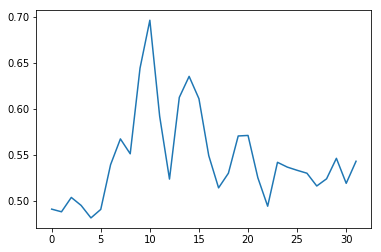

In [6]:
plt.plot(chan_acc)

In [5]:
acc_main = []
acc_augment = []
acc_channel_wise = []
acc_channel_wise_aug = []
for i in range(10):
    file_name = 'S' + str(i+1) + '.mat'
    electrode, matrix, cat_labels = load_data_binary(file_name)
    
    acc_main.append(cross_validation(matrix, cat_labels, niter = 8))
    
    acc_mat = run_cross_val_with_aug(matrix, cat_labels, niter = 8, k = 0.8)
    acc_augment.append(acc_mat)
    
    acc_chan, acc_chan_aug = channel_wise(electrode, cat_labels)
    
    acc_channel_wise.append(acc_chan)
    acc_channel_wise_aug.append(acc_chan_aug)
    

In [3]:
print(acc_main)

[0.7471098265895953, 0.7702312138728324]


In [4]:
print(acc_augment)

[[[0.8179190751445087, 0.8464343325715822], [0.9335260115606936, 0.8662790697674418], [0.9407514450867052, 0.9379699248120301], [0.9754335260115607, 0.941029900332226]], [[0.8049132947976878, 0.7877906976744187], [0.9291907514450867, 0.8364569083447333], [0.9436416184971098, 0.9385964912280702], [0.976878612716763, 0.9761904761904762]]]


In [7]:
np.save('acc_main_binary.npy', acc_main)
np.save('acc_augment_binary.npy', acc_augment)
np.save('acc_channel_wise_binary.npy', acc_channel_wise)
np.save('acc_channel_wise_aug_binary.npy', acc_channel_wise_aug)

In [9]:
mat = np.load('acc_channel_wise_aug_binary.npy')

In [15]:
no_avg_acc = np.mean(acc_main)*100
no_avg_var = np.var(acc_main)*100

In [16]:
no_avg_acc, no_avg_var

(76.19580924855491, 0.08944462832871138)